# Introduction

In [8]:
import sys
#makin pyrfold visible to the system
sys.path.append('../../')
import pyrfold

## Goal
The goal of this notebook is to introduce you to the TimeCourseStructure class that has been developed for pyrfold. This class is especially good at processing the pickled dictionaries that are currently (140617) produced on hyak. 

### What's new
* compressed dictionaray structures
    * These dictionary stuctures take up less memory and are far easier to work with (computationally speaking) relative to the old run dictionaries (these dictionaries have every individual run for a given experiment)
* pandas data structures for handling structure data over time

# Loading in data

The data structure can accept two types of data - the new compressed data structures and the old uncompressed time structures. Let's initalize the structure both ways so you can see what we're twerking with. 

In [1]:
#First we can load in the example data
import cPickle as pickle
with open('exampledata/example_timecourse.p', 'rb') as temppick:
    notcompressedtimedata = pickle.load(temppick)
with open('exampledata/compresseddict.p', 'rb') as temppick:
    compressedtimedata = pickle.load(temppick)

Let's look at these structures now:

**Non-compressed data**

In [2]:
print "These are the individual runs of the this data"
print notcompressedtimedata.keys()

These are the individual runs of the this data
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [3]:
print 'This is the information contained in a single run'
print notcompressedtimedata[1].keys()

This is the information contained in a single run
['sequence', 'energy', 'total bases', 'time', 'dotbracket', 'type']


**compressed data**

In [4]:
print 'This is the compressed data structure'
print compressedtimedata.keys()

This is the compressed data structure
['dotbracket', 'energy', 'sequence']


In [5]:
print 'Dotbracket conatins:'
print 
print compressedtimedata['dotbracket'].keys()[:20]
print 
print 'All of the unique time points of a given experiment'

Dotbracket conatins:

[0.0, 33.333333333333336, 66.666666666666671, 100.0, 133.33333333333334, 166.66666666666669, 200.0, 233.33333333333334, 266.66666666666669, 300.0, 333.33333333333337, 366.66666666666669, 400.0, 433.33333333333337, 433.34334364395329, 466.66666666666669, 500.00000000000006, 533.33333333333337, 566.66666666666674, 600.0]

All of the unique time points of a given experiment


In [6]:
print 'energy is a dictionary of all of the unique structures (keys) that are seen with given free energy (value)'
print 
print compressedtimedata['energy'].keys()[:20]

energy is a dictionary of all of the unique structures (keys) that are seen with given free energy (value)

['........(((((....)))))', '..((((....)))).....................(((((((....)))))))', '..(((...(((((....)))))))).....(((....)))(((((((((((((......))))))))))))).....', '.....', '.(((((.((((((....))).)))............)))))', '((((((....)))....(((................)))))).((((((((((......))))))))))', '..((((....))))......................', '..((((....))))....................', '...(((..(((((....)))))..............)))(((....)))...', '..(((...(((((....))))))))......(((((((.......)))))))(((....))).', '((((....(((((....)))))..........((((((((((....)))))))))).))))', '..(((...(((((....))))).........)))(((........)))', '..(((...(((((....))))).........))).', '...(((..(((((....)))))..............)))(((....))).......', '((((((..(((((....)))))..............)))))).....((((((......))))))', '..(((...(((((....))))))))........', '((((((..(((((....)))))..........((((((((((....))))))))))....))))))..........

You should explore these data structures until you undersand what's going on. 

In [9]:
#Import the object which does all of the heavey lifting
from pyrfold.analyze.timecourse import TimeCourseStructure

#Passing the data to the TimeCourseStructure object#

Now this is a very important thing - There are two ways to initialize the object. 

1. With the compressed dictionary (a much faster way to initilaize the data)
2. With the uncomrpessed dictionary (which will actually be converted to a compressed dictionary before any work is done)
    * **NOTE:** YOU HAVE TO INITIALIZE THE DICTIONARY WITH THE COMMAND .init_from_dictofruns()

In [10]:
#initialize the object with the non-compressed dictionary
timeobj = TimeCourseStructure.init_from_dictofruns(dictionaryofruns=notcompressedtimedata)

Now that we have the object initialized we can extract data from it. We do this through the call:

    timeboj.generate_data(structurewindow = [], timewindow = [], cutoff = 0.0)
    
Structure window is a list containing the start and stop indexes (1 indexed) of the sequence you want look at. The time window tells the object when in time to evaluate these things. If you leave the time window blank it will look at all points in time. Cutoff will remove all structures that observed that do not appear at a MAXIMIM frequency which is above the cutoff. By default this cutoff value is set to 0.0, so all structures that appear will be considered.

In [11]:
#Now we can see that that timeobj structure generated a compressed data structure:
timeobj.dictionary.keys()

['baseadditiontime', 'dotbracket', 'energy', 'sequence']

# So what can we do?
Now that we have the data loaded in the structure - what can we do?
## First - we can find the index of specific parts (assuming we know the sequence)

Let's assume that the following sequence is a part that we are interested in:

    AAGAGACGAAGGCUUCGGCCAAGUCGAAACGGAAACGUCGGAUAGUCGCCCGUCCCG

In [12]:
#Now we can find the position index of this part

timeobj.find_sequence_index('AAGAGACGAAGGCUUCGGCCAAGUCGAAACGGAAACGUCGGAUAGUCGCCCGUCCCG')

[35, 91]

In [14]:
#now we can generate data using this index:

timeobj.generate_data(structurewindow = [35,91])

In [15]:
#Now this data has been put into a pandas data frame:

timeobj.structuredataframe

,.)))(((...(((....)))...(((..(((....))))))...)))))))))))..,....(((...(((....)))..)))...(((....))).)))))))).)))))))..,....(((...(((....)))..)))...(((....))).))))))..))))))))).,.)))(((...(((....)))...((((..........))))...)))))))))))).,.)))(((...(((....)))...(((..(((....))))))...)))))))))))).,....(((...(((....)))..)))...(((....))).)))))))).))))..))),....(((...(((....)))..)))...(((....))).))))))..)))))))))(,.)))(((...(((....)))...(((..(((....))))))...))))))))))))(,....(((...(((....)))..)))...(((....))).)))))))).))))))).(,....(((...(((....)))..)))...(((....))).))))))....))))((((,....(((...(((....)))..)))...(((....))).))))))..))))((((..,......(((.(((....)))...)))..(((....))).))))))..))))))))).
time,,,,,,,,,,,,
3006.0,0.1,0.1,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3006.7,0.0,0.1,0.8,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3006.8,0.0,0.1,0.8,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3006.9,0.0,0.1,0.8,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039.4,0.0,0.1,0.8,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039.5,0.0,0.0,0.8,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
3072.8,0.0,0.0,0.8,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
3106.2,0.0,0.0,0.8,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
3139.6,0.0,0.0,0.8,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# You will notice that this data is starting from time 0 and our part doesn't appear 
# for a while after this time point.
# To get around this I have added the option of "firstexposure" 
# this truncates the data frame to avoid time points when the requested structure 
# doesn't exist

timeobj.generate_data(structurewindow = [35,91],firstexposure=True)

Now you can do anything that would normally be able to do with a pandas data frame. 

Here are some commands that I think are essential:

In [18]:
print "look at all of the structures that are seen"
timeobj.structuredataframe.columns.tolist()

look at all of the structures that are seen


['.)))(((...(((....)))...(((..(((....))))))...)))))))))))..',
 '....(((...(((....)))..)))...(((....))).)))))))).)))))))..',
 '....(((...(((....)))..)))...(((....))).))))))..))))))))).',
 '.)))(((...(((....)))...((((..........))))...)))))))))))).',
 '.)))(((...(((....)))...(((..(((....))))))...)))))))))))).',
 '....(((...(((....)))..)))...(((....))).)))))))).))))..)))',
 '....(((...(((....)))..)))...(((....))).))))))..)))))))))(',
 '.)))(((...(((....)))...(((..(((....))))))...))))))))))))(',
 '....(((...(((....)))..)))...(((....))).)))))))).))))))).(',
 '....(((...(((....)))..)))...(((....))).))))))....))))((((',
 '....(((...(((....)))..)))...(((....))).))))))..))))((((..',
 '......(((.(((....)))...)))..(((....))).))))))..))))))))).']

In [19]:
print "look at a specific structure"
timeobj.structuredataframe['....(((...(((....)))..)))...(((....))).))))))..))))))))).']

look at a specific structure


time
3006.0    0.8
3006.7    0.8
3006.8    0.8
3006.9    0.8
3039.4    0.8
3039.5    0.8
3072.8    0.8
3106.2    0.8
3139.6    0.8
3173.0    0.8
3173.1    0.8
3174.0    0.8
3174.2    0.8
3174.7    0.8
3174.9    0.8
3178.1    0.8
3179.0    0.8
3185.2    0.8
3206.4    0.8
3239.8    0.8
3273.2    0.8
3287.4    0.8
3306.6    0.8
3340.0    0.8
3373.4    0.8
3373.5    0.4
3374.2    0.4
3375.3    0.3
3375.7    0.2
3377.8    0.1
         ... 
6139.0    0.7
6139.1    0.8
6140.4    0.8
6145.6    0.8
6145.7    0.8
6145.8    0.8
6145.9    0.8
6146.0    0.8
6146.1    0.8
6146.4    0.8
6146.7    0.8
6147.1    0.9
6147.2    0.8
6179.0    0.8
6179.1    0.7
6179.2    0.7
6179.5    0.7
6181.3    0.7
6212.4    0.7
6245.8    0.7
6279.2    0.7
6300.5    0.8
6306.8    0.8
6312.6    0.8
6523.0    0.9
6662.1    0.9
6734.7    1.0
6770.4    1.0
6798.5    1.0
6798.6    1.0
Name: ....(((...(((....)))..)))...(((....))).))))))..)))))))))., dtype: float64

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


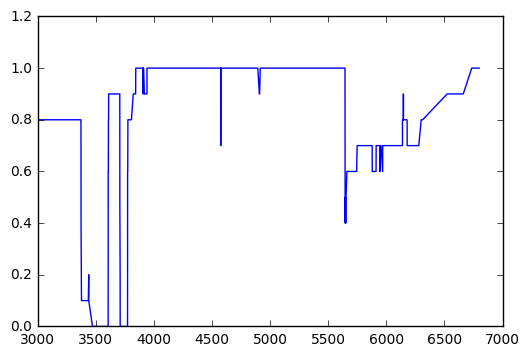

In [20]:
#these structures are very easy to plot using matplotlib 
%matplotlib inline
import matplotlib.pylab as plt
timelist = timeobj.structuredataframe.index.tolist()
structurelist = timeobj.structuredataframe['....(((...(((....)))..)))...(((....))).))))))..))))))))).']
plt.plot(timelist, structurelist)

## BUT PANDAS CAN DO A LOT OF THIS STUFF FOR YOU

Pandas is a very feature rich package for python. It contains many built in plotting features for data stored in its 'DataFrame' objects

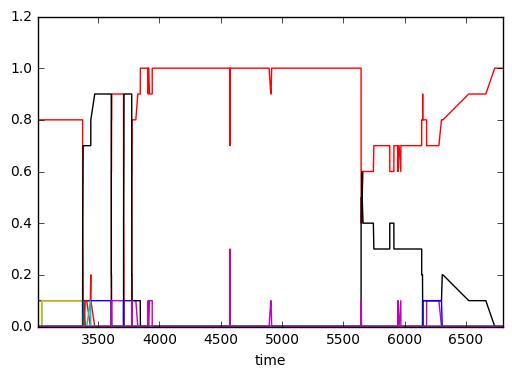

In [21]:
timeobj.structuredataframe.plot(legend=False)

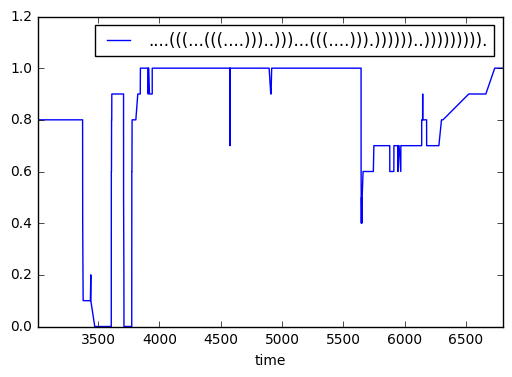

In [22]:
timeobj.structuredataframe.plot(y = ['....(((...(((....)))..)))...(((....))).))))))..))))))))).'])

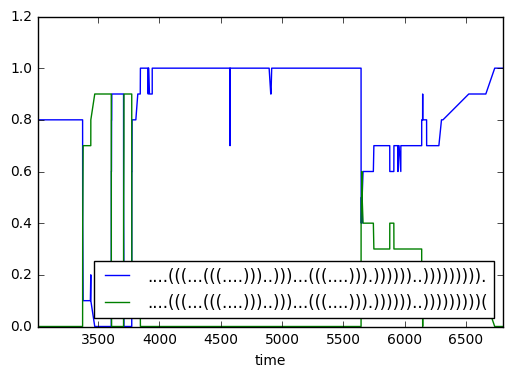

In [23]:
timeobj.structuredataframe.plot(y = ['....(((...(((....)))..)))...(((....))).))))))..))))))))).', '....(((...(((....)))..)))...(((....))).))))))..)))))))))('])

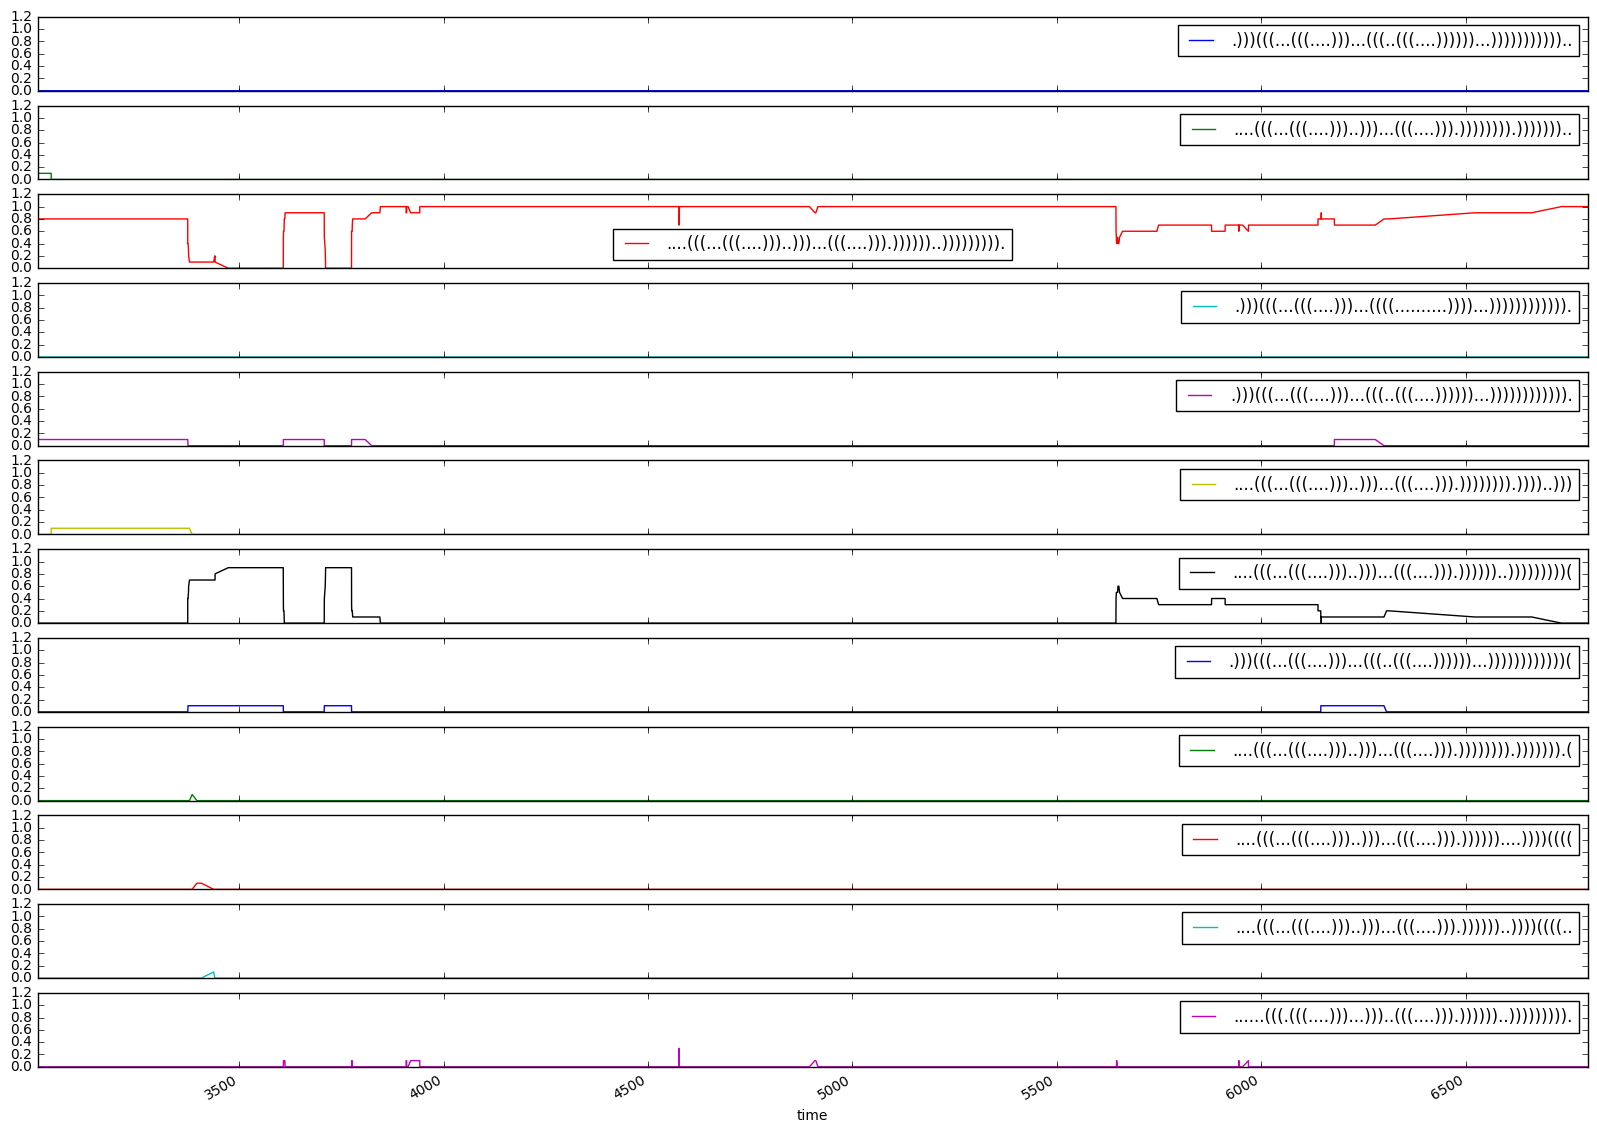

In [24]:
timeobj.structuredataframe.plot(subplots=True, figsize=(20,15), sharey=True);

wants:
input
give a strucutre (just a structure)
, where the structure is (start location) 
output
when and how much appears

Want to be able to plot it

Integrate these things 

Compare multiple parts 

